<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   W_PCT            2849 non-null   float64
 1   AGE              2849 non-null   int64  
 2   FGM              2849 non-null   float64
 3   FGA              2849 non-null   float64
 4   FG_PCT           2849 non-null   float64
 5   FG3M             2849 non-null   float64
 6   FG3A             2849 non-null   float64
 7   FG3_PCT          2849 non-null   float64
 8   FTM              2849 non-null   float64
 9   FTA              2849 non-null   float64
 10  FT_PCT           2849 non-null   float64
 11  OREB             2849 non-null   float64
 12  DREB             2849 non-null   float64
 13  REB              2849 non-null   float64
 14  AST              2849 non-null   float64
 15  TOV              2849 non-null   float64
 16  STL              2849 non-null   float64
 17  BLK           

<AxesSubplot:xlabel='W_PCT', ylabel='count'>

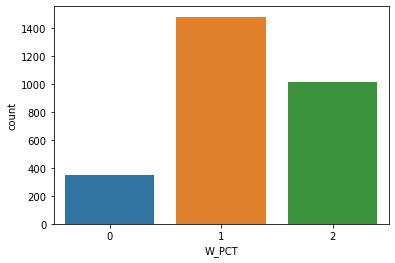

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# step1 loading data,check null value
player=pd.read_csv('2010-16.csv',sep=',')
player.info()
player.isnull().sum()
# step 2, processing data,set up unique labels and group names,use labelEncoder to set up the ratio to 0,1,
# use sns to shrew it into  a graph
# may play with the bins and make the bins lean more towards the high win ratio
bins=(-0.1,0.5,0.7,1.0)
group_names=['low','medium','high']
player['W_PCT']=pd.cut(player['W_PCT'], bins=bins,labels=group_names)
player['W_PCT'].unique()

label_ratio=LabelEncoder()
player['W_PCT']=label_ratio.fit_transform(player['W_PCT'].astype(str))
sns.countplot(x=player['W_PCT'])

In [2]:
player.head(65)
# label(1,2,0) for low,medium,high

,W_PCT,AGE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3
0,1,26,3.7,9.9,0.375,1.2,4.0,0.297,2.1,2.4,...,0.6,0.1,0.7,1.9,2.1,10.7,-2.8,18.5,2,0
1,2,26,1.4,2.4,0.566,0.0,0.0,0.000,0.4,0.8,...,0.3,0.3,0.3,2.3,0.7,3.1,0.7,9.6,2,0
2,1,26,1.6,3.6,0.435,0.1,0.7,0.167,0.9,1.3,...,0.6,0.0,0.4,1.2,1.2,4.2,-2.6,9.2,0,0
3,1,24,2.3,6.4,0.356,0.8,3.0,0.275,1.1,1.6,...,0.6,0.0,0.2,1.2,1.5,6.5,0.5,12.3,0,0
4,2,31,3.8,9.2,0.416,1.6,4.5,0.357,1.2,1.6,...,0.5,0.1,0.6,2.8,1.5,10.5,1.8,18.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2,31,1.9,4.3,0.440,0.5,1.1,0.449,0.6,0.7,...,0.3,0.0,0.0,1.1,0.8,4.8,1.6,9.8,0,0
61,0,29,7.3,14.3,0.510,0.0,0.0,0.000,2.9,4.1,...,0.8,0.3,1.5,3.2,3.1,17.5,4.7,33.4,30,0
62,1,28,4.1,10.5,0.390,2.1,5.8,0.370,1.2,1.5,...,1.6,0.2,0.6,1.5,1.3,11.5,-1.7,23.8,2,0
63,2,27,8.9,19.5,0.455,1.2,3.3,0.378,6.6,7.9,...,0.9,0.6,1.4,2.9,5.5,25.6,2.4,40.4,18,0


In [3]:

player['W_PCT'].value_counts()

1    1481
2    1016
0     352
Name: W_PCT, dtype: int64

In [4]:
# step 3, seperate the dataset as response variable and feature variables, get ready for model
X=player.drop('W_PCT',axis=1)
y=player['W_PCT']

In [5]:
# step 4,Use train_test_split(package) to split the data to  Train data and Test data, default test_size 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#step 5 ,Scale up the data Applying Standart scaling to get optimized result eg, big number overweight the impact of small number
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# X_test[:10]


In [7]:
# step 6,choose classifier
# RANDOM FOREST -Least amount of parts to fine-tune,
# used for a medium sized data set
# 1,create randomForest variable,2,fit the training data to it,3 predict
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [8]:
# X_test[:20]
# the test data print out have been sacled

In [9]:
pred_rfc[:20]

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1])

In [10]:
# check the performence of the model
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
# the consusion matrix report shows a lot of miss lable of 'low' and 'high'


              precision    recall  f1-score   support

           0       0.67      0.19      0.29        74
           1       0.75      0.85      0.80       302
           2       0.61      0.64      0.63       194

    accuracy                           0.69       570
   macro avg       0.67      0.56      0.57       570
weighted avg       0.69      0.69      0.67       570

[[ 14  21  39]
 [  4 257  41]
 [  3  66 125]]


In [11]:
# SVM classifier
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)


In [12]:
# check performence of model
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.05      0.10        74
           1       0.73      0.89      0.80       302
           2       0.61      0.62      0.62       194

    accuracy                           0.69       570
   macro avg       0.71      0.52      0.51       570
weighted avg       0.70      0.69      0.65       570

[[  4  28  42]
 [  0 268  34]
 [  1  72 121]]


In [13]:
# Neural Network classifier
# works well with huge amount of data
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
# A convergence point is a machine learning models localized optimal state. 
# It basically means that the variables within the model have the best posible values in order to
# predict a target feature based on another set of features. In MLP, these variables are the weights within each neuron. 
# Generally, when a data set doesn't represent a organized and discernable pattern, machine learning algorithms might not be able to find a convergence point

              precision    recall  f1-score   support

           0       0.53      0.28      0.37        74
           1       0.74      0.81      0.77       302
           2       0.58      0.59      0.59       194

    accuracy                           0.67       570
   macro avg       0.61      0.56      0.58       570
weighted avg       0.66      0.67      0.66       570

[[ 21  20  33]
 [  8 245  49]
 [ 11  68 115]]


In [14]:
# last step, use the choosen model and given new feature data to predict 
Xnew=[[23,1.6,3.2,0.513,0,0,0,0.6,0.8,0.677,0.8,1.6,2.4,0.3,0.4,0.3,0.5,0.3,0.9,0.8,3.8,-1.8,9.1,1,0]]


In [15]:
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
ynew

array([1])